**PARKINSON SPEECH DATASET WITH MULTIPLE TYPES OF SOUND RECORDINGS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('/content/train_data.txt',names=['Subject id','Jitter (local)','Jitter (local, absolute)','Jitter (rap)','Jitter (ppq5)','Jitter ddp','Shimmer (local)','Shimmer (local, dB)','Shimmer (apq3)','Shimmer (apq5)','Shimmer (apq11)','Shimmer (dda)','AC','NTH','HTN','Median pitch','Mean pitch','Standard deviation','Minimum pitch','Maximum pitch','Number of pauses','Number of periods','Mean period','Standard deviation of period','Fraction of locally unvoiced frames','Number of voice breaks','Degree of voice breaks','UPDRS','class information'])
print(df)

      Subject id  Jitter (local)  Jitter (local, absolute)  Jitter (rap)  \
0              1           1.488                  0.000090         0.900   
1              1           0.728                  0.000038         0.353   
2              1           1.220                  0.000074         0.732   
3              1           2.502                  0.000123         1.156   
4              1           3.509                  0.000167         1.715   
...          ...             ...                       ...           ...   
1035          40           5.127                  0.000398         2.721   
1036          40           1.757                  0.000133         0.808   
1037          40           2.912                  0.000226         1.141   
1038          40           3.788                  0.000275         1.786   
1039          40           1.809                  0.000149         0.680   

      Jitter (ppq5)  Jitter ddp  Shimmer (local)  Shimmer (local, dB)  \
0             

In [ ]:
df_val=pd.read_csv('/content/test_data.txt', names= ['Subject id','Jitter (local)','Jitter (local, absolute)','Jitter (rap)','Jitter (ppq5)','Jitter ddp','Shimmer (local)','Shimmer (local, dB)','Shimmer (apq3)','Shimmer (apq5)','Shimmer (apq11)','Shimmer (dda)','AC','NTH','HTN','Median pitch','Mean pitch','Standard deviation','Minimum pitch','Maximum pitch','Number of pauses','Number of periods','Mean period','Standard deviation of period','Fraction of locally unvoiced frames','Number of voice breaks','Degree of voice breaks','class information'])
df_val

,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter ddp,Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Minimum pitch,Maximum pitch,Number of pauses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,class information
0,1,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,...,184.502,187.880,183.0,182.0,0.005368,0.000025,0.0,0.0,0.0,1
1,1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,...,198.665,202.214,194.0,193.0,0.004988,0.000020,0.0,0.0,0.0,1
2,1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,...,197.220,206.060,198.0,197.0,0.004940,0.000046,0.0,0.0,0.0,1
3,1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,...,202.324,206.182,200.0,199.0,0.004900,0.000023,0.0,0.0,0.0,1
4,1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,...,205.407,209.927,204.0,203.0,0.004820,0.000022,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,28,0.257,0.000018,0.105,0.122,0.315,5.665,0.544,2.612,3.390,...,122.280,153.180,137.0,136.0,0.007143,0.000407,0.0,0.0,0.0,1
164,28,0.311,0.000021,0.129,0.148,0.388,5.492,0.536,2.422,2.959,...,119.725,163.571,144.0,143.0,0.006852,0.000619,0.0,0.0,0.0,1
165,28,0.434,0.000029,0.178,0.229,0.534,5.048,0.549,2.284,3.082,...,112.170,169.648,145.0,144.0,0.006785,0.000768,0.0,0.0,0.0,1
166,28,0.464,0.000031,0.195,0.227,0.585,4.739,0.536,2.144,2.940,...,113.962,170.945,149.0,148.0,0.006608,0.000834,0.0,0.0,0.0,1


In [ ]:
missing_data=df.notnull()
for column in df.columns:
    print(column)
    print(missing_data[column].value_counts())
    print("")

Subject id
True    1040
Name: Subject id, dtype: int64

Jitter (local)
True    1040
Name: Jitter (local), dtype: int64

Jitter (local, absolute)
True    1040
Name: Jitter (local, absolute), dtype: int64

Jitter (rap)
True    1040
Name: Jitter (rap), dtype: int64

Jitter (ppq5)
True    1040
Name: Jitter (ppq5), dtype: int64

Jitter ddp
True    1040
Name: Jitter ddp, dtype: int64

Shimmer (local)
True    1040
Name: Shimmer (local), dtype: int64

Shimmer (local, dB)
True    1040
Name: Shimmer (local, dB), dtype: int64

Shimmer (apq3)
True    1040
Name: Shimmer (apq3), dtype: int64

Shimmer (apq5)
True    1040
Name: Shimmer (apq5), dtype: int64

Shimmer (apq11)
True    1040
Name: Shimmer (apq11), dtype: int64

Shimmer (dda)
True    1040
Name: Shimmer (dda), dtype: int64

AC
True    1040
Name: AC, dtype: int64

NTH
True    1040
Name: NTH, dtype: int64

HTN
True    1040
Name: HTN, dtype: int64

Median pitch
True    1040
Name: Median pitch, dtype: int64

Mean pitch
True    1040
Name: Mean pit

In [ ]:
df.describe()


,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter ddp,Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pauses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information
count,1040.00000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,20.50000,2.679523,0.000170,1.247053,1.348327,3.741161,12.918391,1.194895,5.699600,7.983552,...,234.875990,109.744231,105.969231,0.006547,0.000843,27.682856,1.134615,12.370042,13.000000,0.500000
std,11.54895,1.765053,0.000106,0.979462,1.138742,2.938443,5.452204,0.420071,3.015183,4.840892,...,121.541243,150.027703,149.417074,0.001875,0.000723,20.975294,1.614764,15.161916,15.894745,0.500241
min,1.00000,0.190000,0.000006,0.062000,0.081000,0.185000,1.185000,0.103000,0.496000,0.708000,...,85.541000,0.000000,0.000000,0.002039,0.000055,0.000000,0.000000,0.000000,1.000000,0.000000
25%,10.75000,1.507500,0.000095,0.617000,0.665750,1.851750,9.353500,0.941000,3.703000,5.160250,...,143.650750,42.750000,40.750000,0.005039,0.000404,8.149250,0.000000,0.000000,1.000000,0.000000
50%,20.50000,2.396000,0.000151,1.035500,1.126500,3.107000,12.348500,1.181500,5.134500,7.050500,...,195.971000,65.000000,62.000000,0.006484,0.000644,26.501000,1.000000,5.826000,3.000000,0.500000
75%,30.25000,3.411500,0.000229,1.602500,1.694750,4.808500,15.493250,1.411000,6.942000,9.558930,...,263.798250,113.000000,109.000000,0.007923,0.000980,43.064250,1.000000,22.255500,23.250000,1.000000
max,40.00000,14.376000,0.000777,8.016000,13.542000,24.048000,41.137000,2.721000,25.820000,72.860000,...,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,12.000000,69.117000,55.000000,1.000000


In [ ]:
df.head()

,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter ddp,Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pauses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [ ]:
df_val.describe()

,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter ddp,Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Minimum pitch,Maximum pitch,Number of pauses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,class information
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0
mean,14.500000,0.640685,0.000043,0.335405,0.374893,1.006220,5.162655,0.474345,2.679363,3.044815,...,151.563018,173.391268,157.601190,155.880952,0.006663,0.000241,0.767256,0.226190,0.658393,1.0
std,8.101896,0.824415,0.000055,0.450116,0.528379,1.350352,3.069454,0.266516,1.799648,1.680081,...,49.301713,48.981540,47.042106,47.303430,0.002116,0.000344,2.366691,0.873443,2.301585,0.0
min,1.000000,0.119000,0.000005,0.048000,0.062000,0.143000,0.813000,0.072000,0.381000,0.485000,...,74.261000,82.171000,34.000000,33.000000,0.003871,0.000020,0.000000,0.000000,0.000000,1.0
25%,7.750000,0.247750,0.000015,0.113500,0.132750,0.340000,3.144000,0.298000,1.470000,1.821750,...,108.933000,140.582000,122.750000,120.750000,0.005140,0.000060,0.000000,0.000000,0.000000,1.0
50%,14.500000,0.405000,0.000028,0.180000,0.218500,0.540000,4.791500,0.442000,2.370500,2.935000,...,149.534500,169.267000,153.500000,152.500000,0.006300,0.000103,0.000000,0.000000,0.000000,1.0
75%,21.250000,0.607500,0.000042,0.344250,0.341000,1.033500,6.457500,0.593500,3.384750,3.755000,...,186.729500,206.090500,191.000000,190.000000,0.007492,0.000250,0.000000,0.000000,0.000000,1.0
max,28.000000,5.238000,0.000443,2.698000,3.188000,8.094000,23.608000,1.944000,13.003000,11.471000,...,252.250000,294.739000,253.000000,252.000000,0.012669,0.002439,15.464000,7.000000,16.959000,1.0


In [ ]:
df_val.head()

,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter ddp,Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Minimum pitch,Maximum pitch,Number of pauses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,class information
0,1,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,...,184.502,187.880,183.0,182.0,0.005368,0.000025,0.0,0.0,0.0,1
1,1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,...,198.665,202.214,194.0,193.0,0.004988,0.000020,0.0,0.0,0.0,1
2,1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,...,197.220,206.060,198.0,197.0,0.004940,0.000046,0.0,0.0,0.0,1
3,1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,...,202.324,206.182,200.0,199.0,0.004900,0.000023,0.0,0.0,0.0,1
4,1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,...,205.407,209.927,204.0,203.0,0.004820,0.000022,0.0,0.0,0.0,1


In [ ]:
#to know the number of rows and columns in testing as well as training data
print(df.shape)
print(df_val.shape)
print(df.size)
print(df_val.size)

(1040, 29)
(168, 28)
30160
4704


Training data has one extra column

In [ ]:
#Finding categorical values if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subject id                           1040 non-null   int64  
 1   Jitter (local)                       1040 non-null   float64
 2   Jitter (local, absolute)             1040 non-null   float64
 3   Jitter (rap)                         1040 non-null   float64
 4   Jitter (ppq5)                        1040 non-null   float64
 5   Jitter ddp                           1040 non-null   float64
 6   Shimmer (local)                      1040 non-null   float64
 7   Shimmer (local, dB)                  1040 non-null   float64
 8   Shimmer (apq3)                       1040 non-null   float64
 9   Shimmer (apq5)                       1040 non-null   float64
 10  Shimmer (apq11)                      1040 non-null   float64
 11  Shimmer (dda)                 

Since all the data is in form of int or float,so there are no categorical value.We just need to find and remove that extra column.

In [ ]:
#finding the extra column
df.columns


Index(['Subject id', 'Jitter (local)', 'Jitter (local, absolute)',
       'Jitter (rap)', 'Jitter (ppq5)', 'Jitter ddp', 'Shimmer (local)',
       'Shimmer (local, dB)', 'Shimmer (apq3)', 'Shimmer (apq5)',
       'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NTH', 'HTN', 'Median pitch',
       'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch',
       'Number of pauses', 'Number of periods', 'Mean period',
       'Standard deviation of period', 'Fraction of locally unvoiced frames',
       'Number of voice breaks', 'Degree of voice breaks', 'UPDRS',
       'class information'],
      dtype='object')

In [ ]:
df_val.columns

Index(['Subject id', 'Jitter (local)', 'Jitter (local, absolute)',
       'Jitter (rap)', 'Jitter (ppq5)', 'Jitter ddp', 'Shimmer (local)',
       'Shimmer (local, dB)', 'Shimmer (apq3)', 'Shimmer (apq5)',
       'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NTH', 'HTN', 'Median pitch',
       'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch',
       'Number of pauses', 'Number of periods', 'Mean period',
       'Standard deviation of period', 'Fraction of locally unvoiced frames',
       'Number of voice breaks', 'Degree of voice breaks',
       'class information'],
      dtype='object')

After analyzing the dataset, we know that class information is our target value and 'UPDR' is the extra column

In [ ]:
#Analyzing our target value
df['class information']

0       1
1       1
2       1
3       1
4       1
       ..
1035    0
1036    0
1037    0
1038    0
1039    0
Name: class information, Length: 1040, dtype: int64

In [ ]:
#counting values in our target value
df['class information'].value_counts()

1    520
0    520
Name: class information, dtype: int64

The given data is balances as half of the data is 0 and the other half is 1.


**DATA VISUALISATION Using matplotlib**

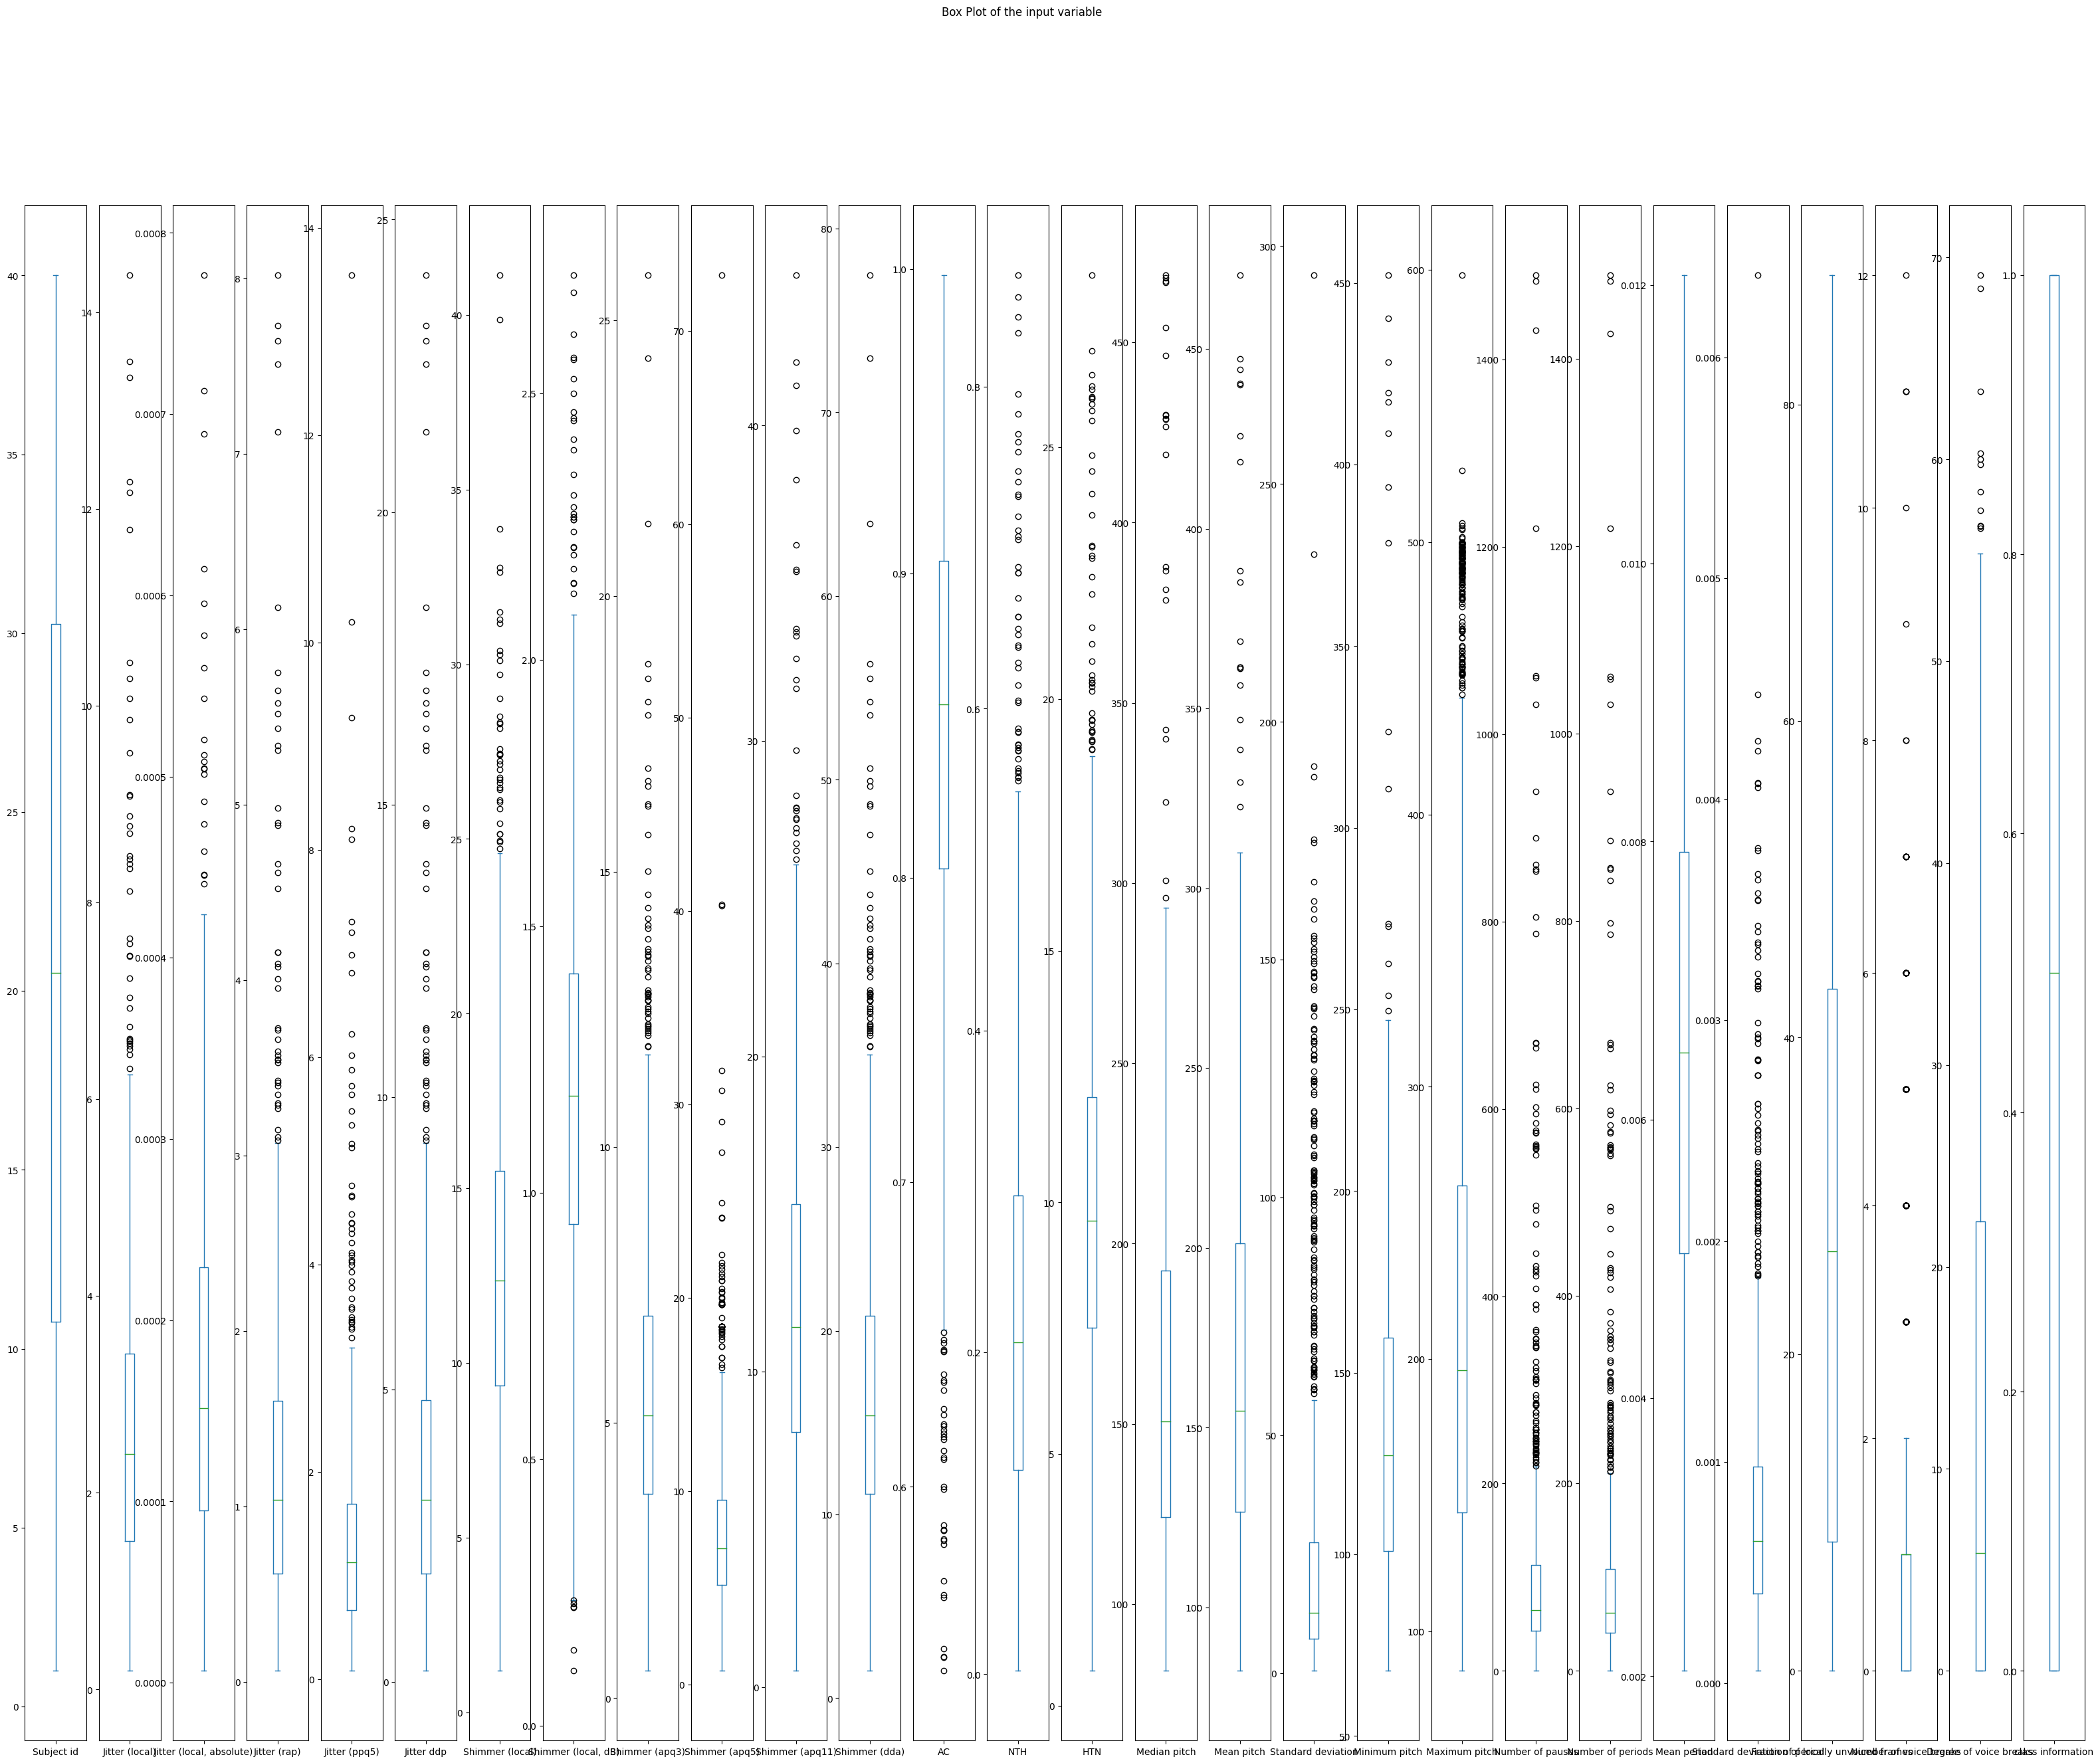

In [ ]:
df.drop( 'UPDRS', axis=1).plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(40,30), title='Box Plot of the input variable')
plt.show()

<Axes: title={'center': 'Impact of the degree of voice break on the UPDRS score'}, xlabel='Degree of voice breaks', ylabel='UPDRS'>

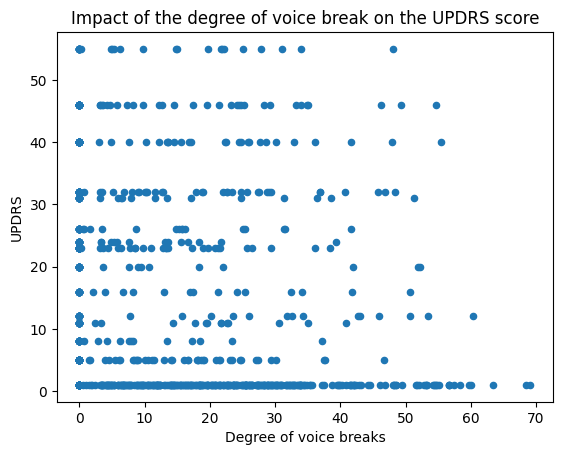

In [ ]:
title = "Impact of the degree of voice break on the UPDRS score"
df.plot.scatter("Degree of voice breaks", "UPDRS", title= title)

In [ ]:

columns=df['Number of voice breaks']
df.describe(print('Number of voice breaks'))


Number of voice breaks


,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter ddp,Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pauses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information
count,1040.00000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,20.50000,2.679523,0.000170,1.247053,1.348327,3.741161,12.918391,1.194895,5.699600,7.983552,...,234.875990,109.744231,105.969231,0.006547,0.000843,27.682856,1.134615,12.370042,13.000000,0.500000
std,11.54895,1.765053,0.000106,0.979462,1.138742,2.938443,5.452204,0.420071,3.015183,4.840892,...,121.541243,150.027703,149.417074,0.001875,0.000723,20.975294,1.614764,15.161916,15.894745,0.500241
min,1.00000,0.190000,0.000006,0.062000,0.081000,0.185000,1.185000,0.103000,0.496000,0.708000,...,85.541000,0.000000,0.000000,0.002039,0.000055,0.000000,0.000000,0.000000,1.000000,0.000000
25%,10.75000,1.507500,0.000095,0.617000,0.665750,1.851750,9.353500,0.941000,3.703000,5.160250,...,143.650750,42.750000,40.750000,0.005039,0.000404,8.149250,0.000000,0.000000,1.000000,0.000000
50%,20.50000,2.396000,0.000151,1.035500,1.126500,3.107000,12.348500,1.181500,5.134500,7.050500,...,195.971000,65.000000,62.000000,0.006484,0.000644,26.501000,1.000000,5.826000,3.000000,0.500000
75%,30.25000,3.411500,0.000229,1.602500,1.694750,4.808500,15.493250,1.411000,6.942000,9.558930,...,263.798250,113.000000,109.000000,0.007923,0.000980,43.064250,1.000000,22.255500,23.250000,1.000000
max,40.00000,14.376000,0.000777,8.016000,13.542000,24.048000,41.137000,2.721000,25.820000,72.860000,...,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,12.000000,69.117000,55.000000,1.000000


<Axes: title={'center': 'Impact of the number of unspoken words on the UPDRS score'}, xlabel='Fraction of locally unvoiced frames', ylabel='UPDRS'>

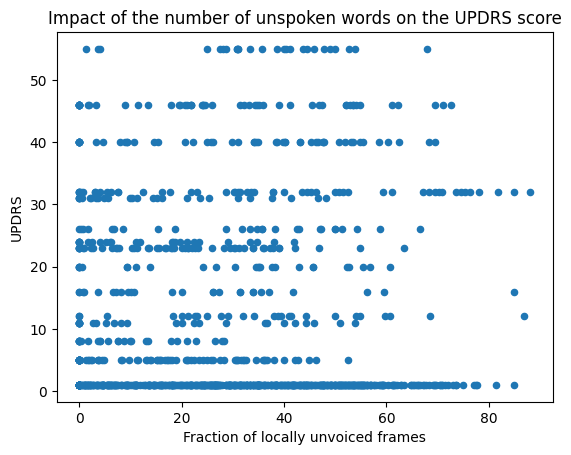

In [ ]:
title = "Impact of the number of unspoken words on the UPDRS score"
df.plot.scatter("Fraction of locally unvoiced frames", "UPDRS", title= title)

In [ ]:
#For finding missing values in our data
df.dtypes

Subject id                               int64
Jitter (local)                         float64
Jitter (local, absolute)               float64
Jitter (rap)                           float64
Jitter (ppq5)                          float64
Jitter ddp                             float64
Shimmer (local)                        float64
Shimmer (local, dB)                    float64
Shimmer (apq3)                         float64
Shimmer (apq5)                         float64
Shimmer (apq11)                        float64
Shimmer (dda)                          float64
AC                                     float64
NTH                                    float64
HTN                                    float64
Median pitch                           float64
Mean pitch                             float64
Standard deviation                     float64
Minimum pitch                          float64
Maximum pitch                          float64
Number of pauses                         int64
Number of per

In [ ]:
df.isnull().sum()


Subject id                             0
Jitter (local)                         0
Jitter (local, absolute)               0
Jitter (rap)                           0
Jitter (ppq5)                          0
Jitter ddp                             0
Shimmer (local)                        0
Shimmer (local, dB)                    0
Shimmer (apq3)                         0
Shimmer (apq5)                         0
Shimmer (apq11)                        0
Shimmer (dda)                          0
AC                                     0
NTH                                    0
HTN                                    0
Median pitch                           0
Mean pitch                             0
Standard deviation                     0
Minimum pitch                          0
Maximum pitch                          0
Number of pauses                       0
Number of periods                      0
Mean period                            0
Standard deviation of period           0
Fraction of loca

In [ ]:
df_val.isnull().sum()

Subject id                             0
Jitter (local)                         0
Jitter (local, absolute)               0
Jitter (rap)                           0
Jitter (ppq5)                          0
Jitter ddp                             0
Shimmer (local)                        0
Shimmer (local, dB)                    0
Shimmer (apq3)                         0
Shimmer (apq5)                         0
Shimmer (apq11)                        0
Shimmer (dda)                          0
AC                                     0
NTH                                    0
HTN                                    0
Median pitch                           0
Mean pitch                             0
Standard deviation                     0
Minimum pitch                          0
Maximum pitch                          0
Number of pauses                       0
Number of periods                      0
Mean period                            0
Standard deviation of period           0
Fraction of loca

**Process of creating a bar plot using the Seaborn library** of Target value

Axes(0.125,0.11;0.775x0.77)


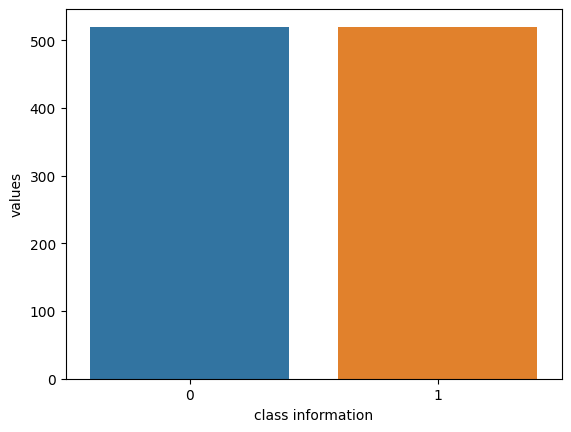

In [ ]:
temp = df['class information'].value_counts()
temp_df = pd.DataFrame({'class information' : temp.index, 'values': temp.values})
print(sns.barplot(x = 'class information', y= 'values' , data = temp_df))

USING *distplot* to plot a distribution plot for each column in the DataFrame and analyzing the distribution of DATA

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


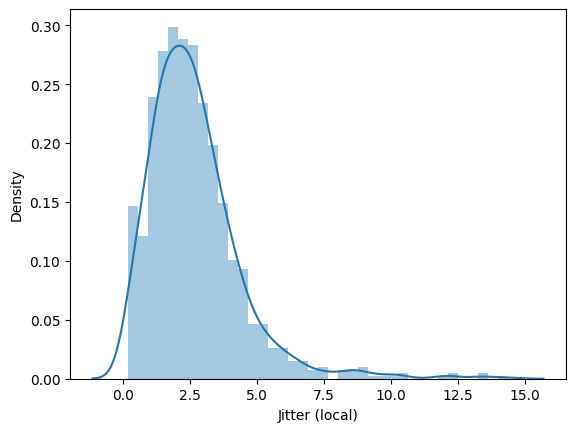

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


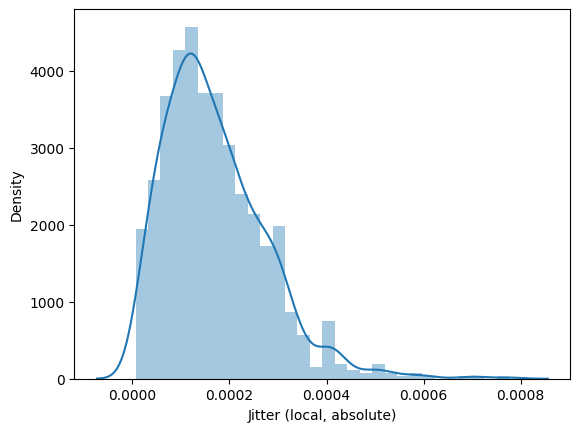

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


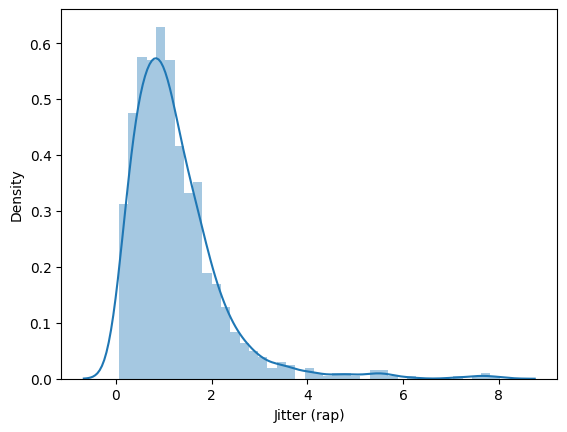

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


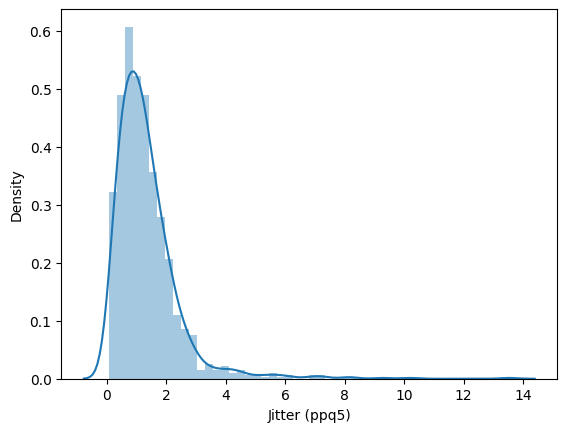

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


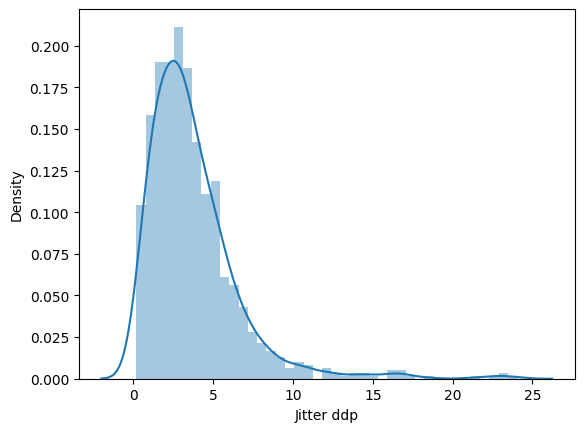

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


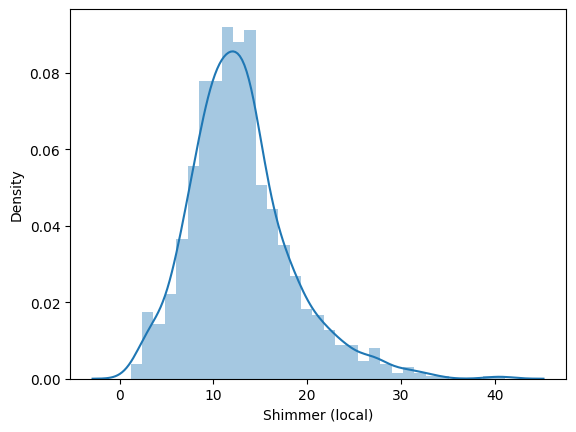

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


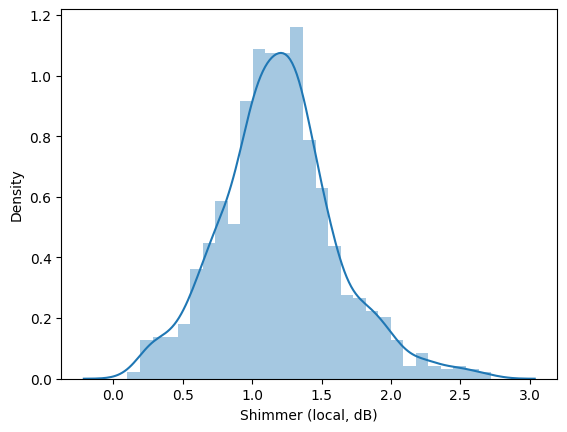

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


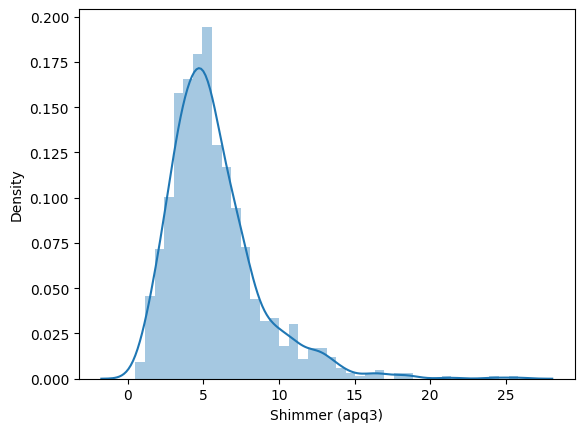

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


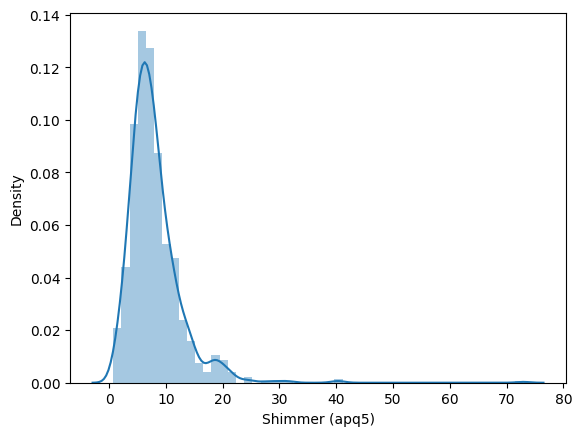

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


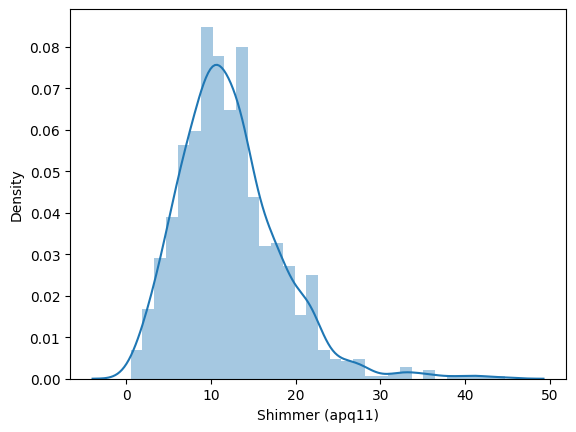

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


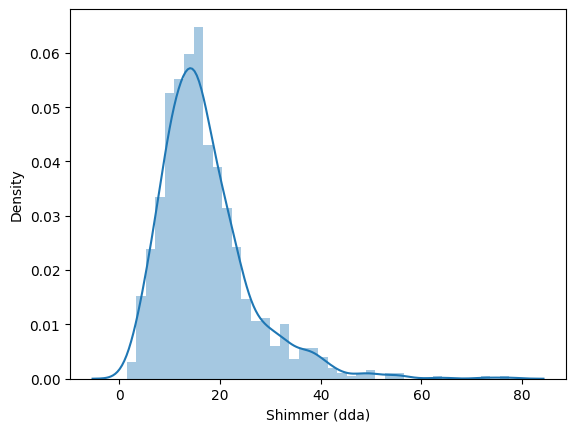

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


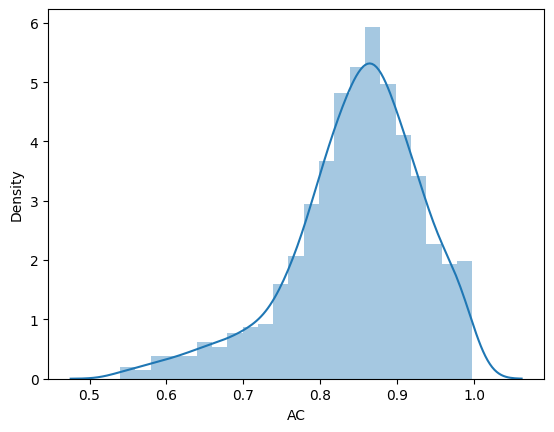

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


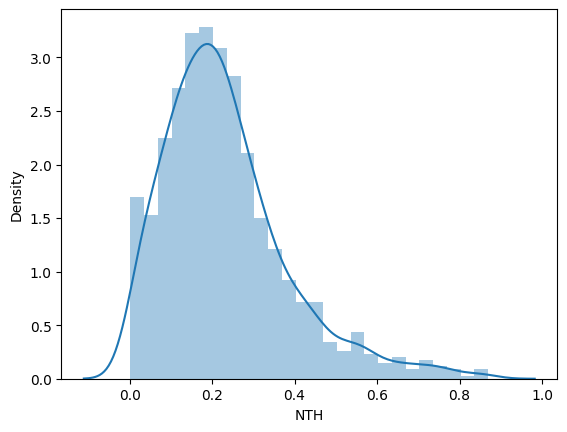

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


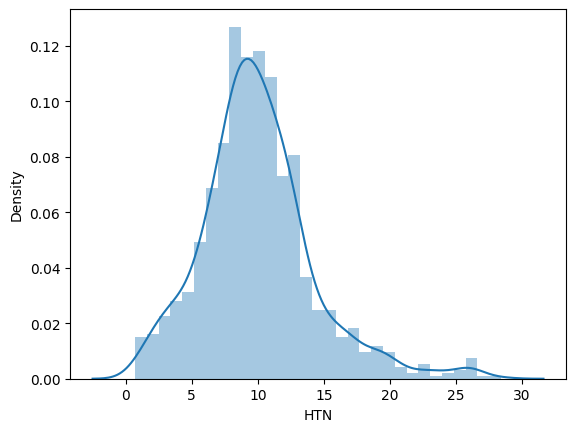

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


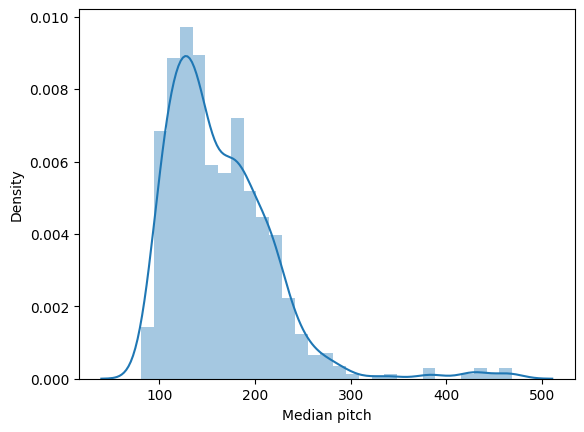

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


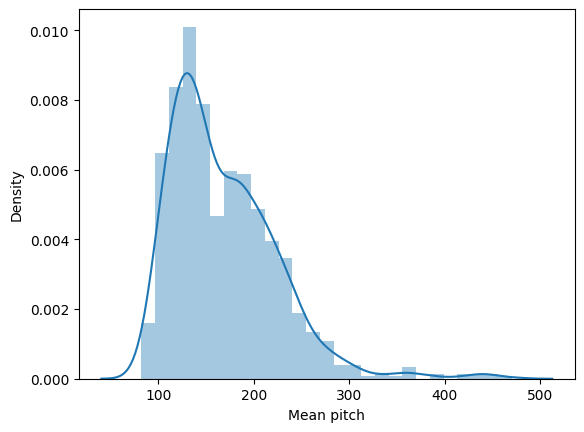

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


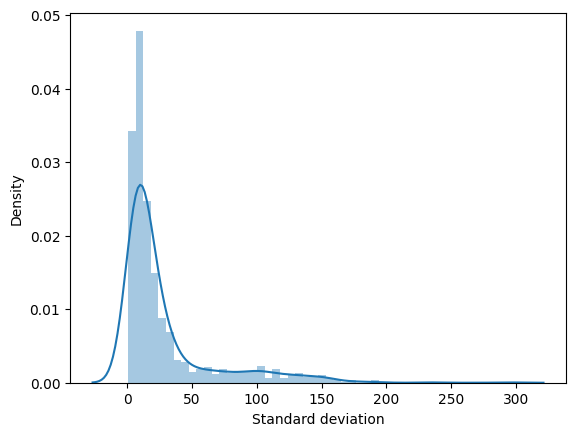

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


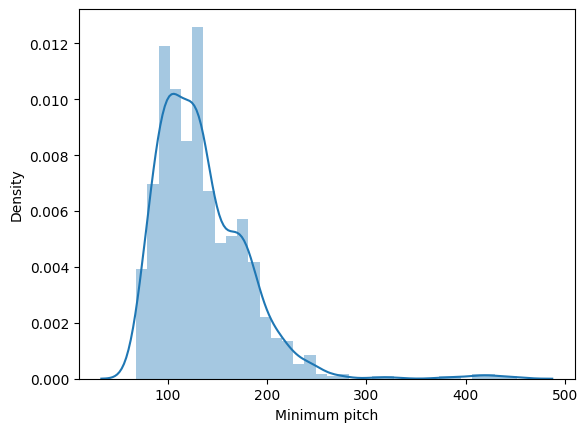

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


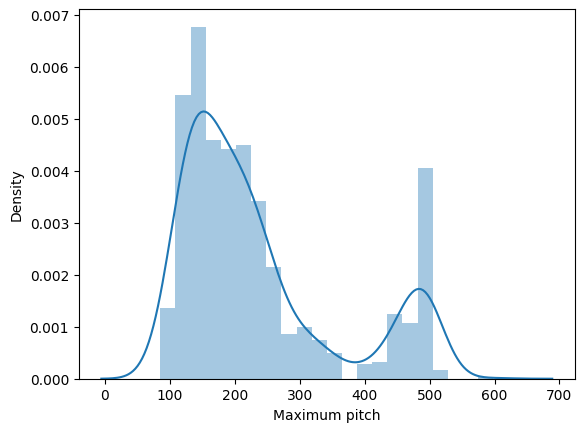

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


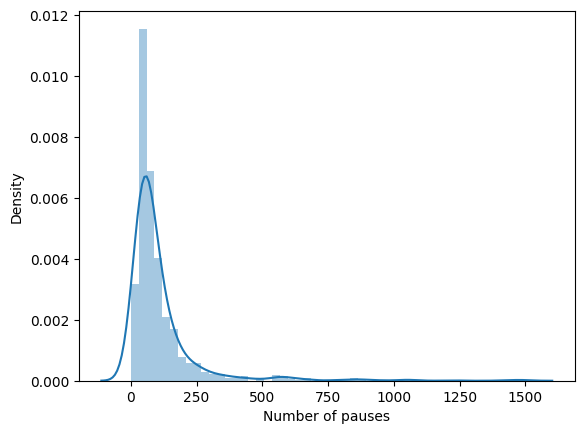

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


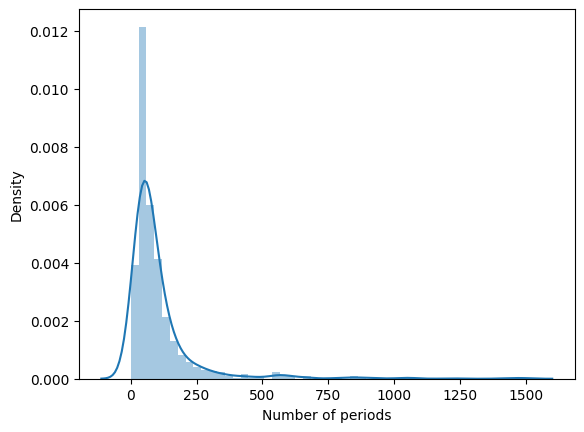

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


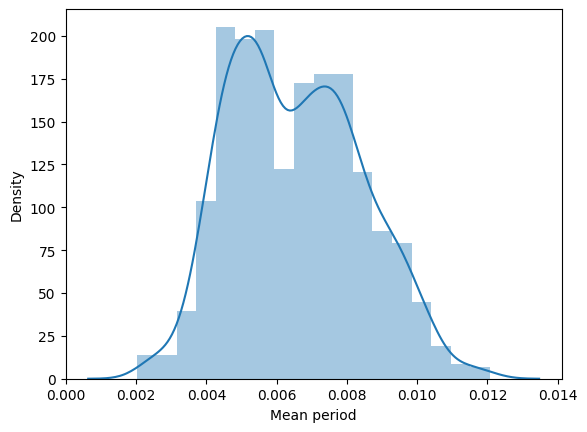

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


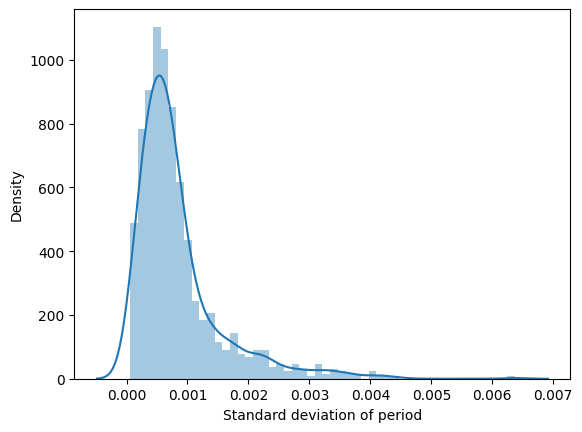

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


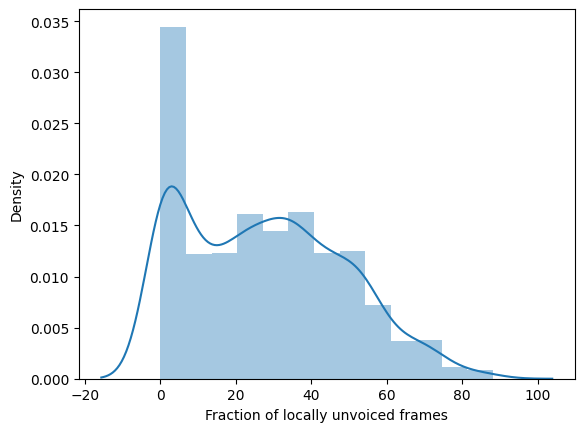

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


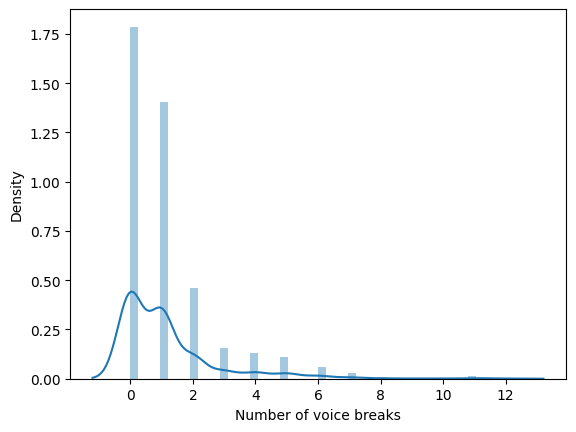

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


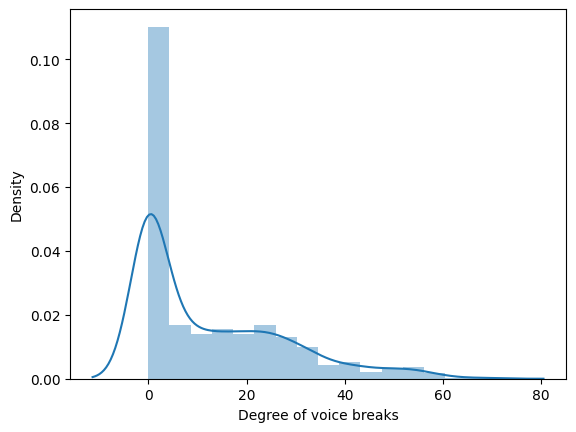

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


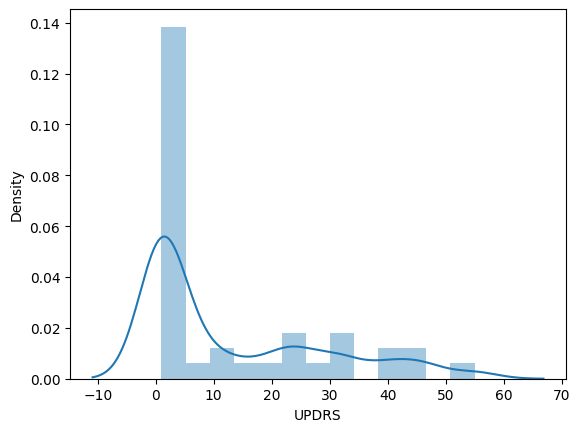

<ipython-input-24-a379627f0a94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


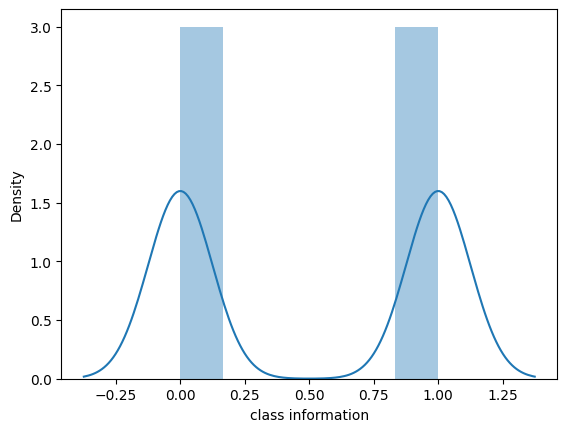

In [ ]:
def distplot(col):
  sns.distplot(df[col])
  plt.show()

for i in list(df.columns)[1:]:
  distplot(i)

Creating a correlation matrix

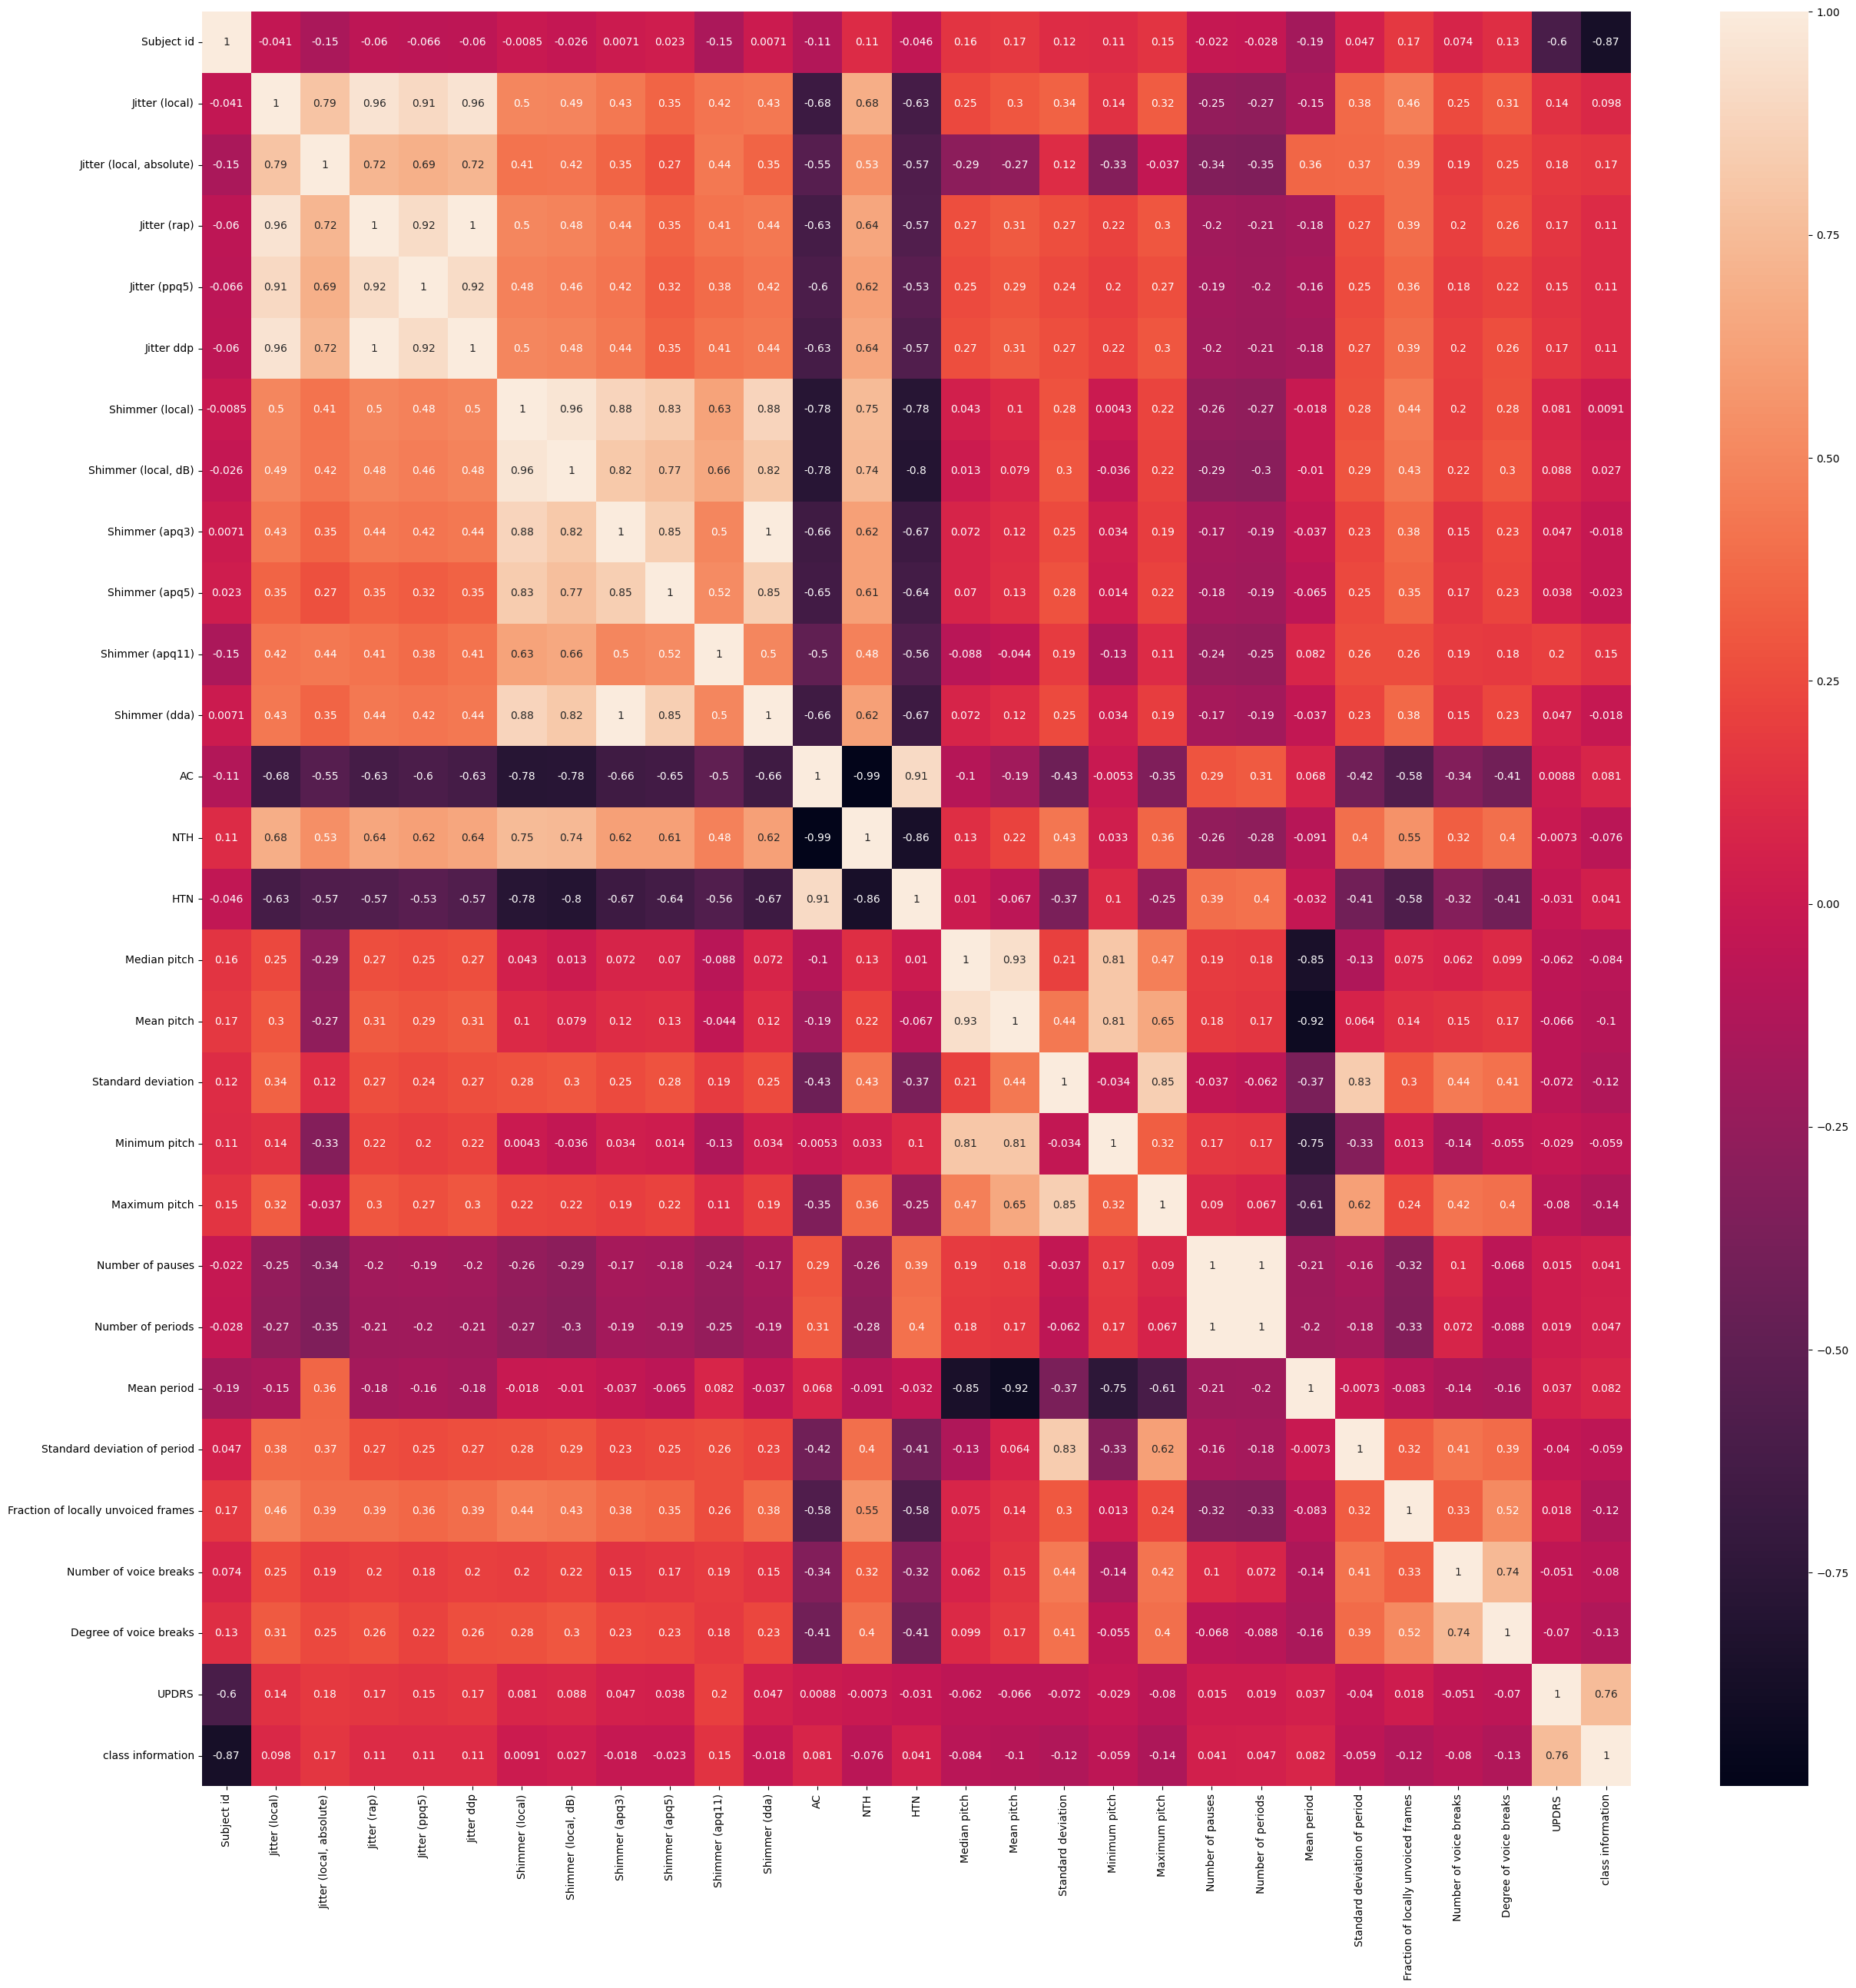

In [ ]:
# Calculate correlation matrix
corr = df.corr()
# Create a larger figure
plt.figure(figsize=(30, 30))
# Create heatmap
sns.heatmap(corr, annot=True)
# Display the plot
plt.show()

**Assigning data to new variable for train and test data**

In [ ]:
train_df =  df
print(train_df)

      Subject id  Jitter (local)  Jitter (local, absolute)  Jitter (rap)  \
0              1           1.488                  0.000090         0.900   
1              1           0.728                  0.000038         0.353   
2              1           1.220                  0.000074         0.732   
3              1           2.502                  0.000123         1.156   
4              1           3.509                  0.000167         1.715   
...          ...             ...                       ...           ...   
1035          40           5.127                  0.000398         2.721   
1036          40           1.757                  0.000133         0.808   
1037          40           2.912                  0.000226         1.141   
1038          40           3.788                  0.000275         1.786   
1039          40           1.809                  0.000149         0.680   

      Jitter (ppq5)  Jitter ddp  Shimmer (local)  Shimmer (local, dB)  \
0             

In [ ]:
test_df =  df_val
print(test_df)

     Subject id  Jitter (local)  Jitter (local, absolute)  Jitter (rap)  \
0             1           0.135                  0.000007         0.067   
1             1           0.143                  0.000007         0.073   
2             1           0.162                  0.000008         0.087   
3             1           0.140                  0.000007         0.075   
4             1           0.150                  0.000007         0.080   
..          ...             ...                       ...           ...   
163          28           0.257                  0.000018         0.105   
164          28           0.311                  0.000021         0.129   
165          28           0.434                  0.000029         0.178   
166          28           0.464                  0.000031         0.195   
167          28           0.474                  0.000031         0.179   

     Jitter (ppq5)  Jitter ddp  Shimmer (local)  Shimmer (local, dB)  \
0            0.078       0.

As we know that there is an extra column i our train set. So we need to identify the extra column and drop it from train data.2 sets Created to store the column names of two DataFrames, train_df and test_df

In [ ]:
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)
extra_columns = train_columns.difference(test_columns)

In [ ]:
#Drop the extra columns from the training data
train_df.drop(columns= extra_columns, inplace = True)
train_df

,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter ddp,Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Minimum pitch,Maximum pitch,Number of pauses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,96.145,158.591,63,60,0.007766,0.001066,24.194,2,15.113,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,121.490,143.797,47,44,0.007561,0.000430,46.053,1,25.792,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,95.921,149.641,79,77,0.007767,0.000881,20.000,1,4.574,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,90.051,451.366,75,70,0.007257,0.001714,16.667,3,19.575,0


In [ ]:
train_df.shape
test_df.shape

(168, 28)

In [ ]:
x_train = train_df.drop('class information', axis =1)
y_train = train_df['class information']
print(x_train.shape)
print(y_train.shape)

(1040, 27)
(1040,)


In [ ]:
x_test = test_df.drop('class information', axis = 1)
y_test = test_df['class information']
print(x_test.shape)
print(y_test.shape)

(168, 27)
(168,)


*This is helpful for understanding the dimensions of your data before training a machine learning model.*

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler

**Performing scaling operations on data using Scikit learn**

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

calculates the mean and standard deviation of each feature in x_train and x_test

---



Binary CLASSIFICATION




**The Perceptron is a linear classification algorithm that can be used for binary classification tasks.**

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(x_train_scaled, y_train)

Perceptron()

In [ ]:
train_pred = clf.predict(x_train_scaled)
train_pred
print(train_pred)


[1 1 1 ... 0 0 0]


In [ ]:
test_pred = clf.predict(x_test_scaled)
test_pred
print(test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**CALCULATING ACCURACY SCORES**

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy =  accuracy_score(y_test, test_pred)
print(train_accuracy)
print(test_accuracy)

1.0
0.6547619047619048


Importing Classifiers to train and evaluate models

In [ ]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
clf1 = Perceptron()
clf2 = LogisticRegression()
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier()
clf5 = KNeighborsClassifier()
clf6 = SVC()
clf = [clf1, clf2, clf3, clf4, clf5, clf6]
clf_name = ['PER', 'LR','GNB','DTC' ,'KNN', 'SVC']

In [ ]:
acc_train = {}
train_acc1 = []
from sklearn.metrics import accuracy_score
for model, name in zip(clf, clf_name):
  model.fit(x_train_scaled, y_train)
  pred= model.predict(x_train_scaled)
  acc_train[name] = accuracy_score(pred, y_train)

print("Training accuracy: ")
for i, j in acc_train.items():
  train_acc1.append(j)
  print(i , ":", j)

train_acc1

Training accuracy: 
PER : 1.0
LR : 1.0
GNB : 0.8894230769230769
DTC : 1.0
KNN : 0.9519230769230769
SVC : 0.9961538461538462


[1.0, 1.0, 0.8894230769230769, 1.0, 0.9519230769230769, 0.9961538461538462]

Bar graph of classification models

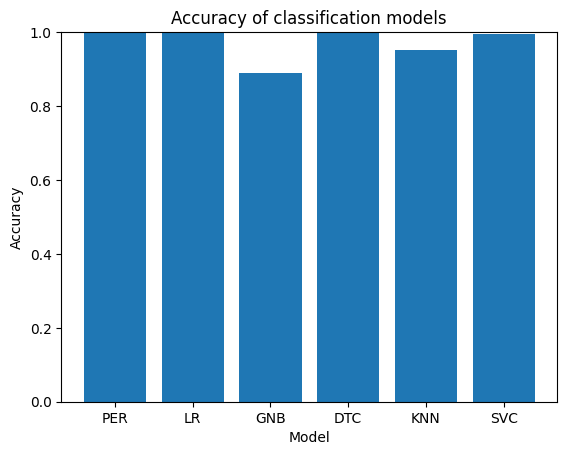

In [ ]:
import matplotlib.pyplot as plt
plt.bar(clf_name, train_acc1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of classification models')
plt.ylim(0,1)
plt.show()

**ACCURACY TESTING**

In [ ]:
acc_test = {}
test_acc1 =[]
from sklearn.metrics import accuracy_score
for model, name in zip(clf, clf_name):
  model.fit(x_train_scaled, y_train)
  pred= model.predict(x_test_scaled)
  acc_test[name] = accuracy_score(pred, y_test)

print("Testing accuracy: ")
for i, j in acc_test.items():
  test_acc1.append(j)
  print(i , ":", j)

test_acc1

Testing accuracy: 
PER : 0.6547619047619048
LR : 0.6071428571428571
GNB : 0.5059523809523809
DTC : 0.7142857142857143
KNN : 0.6607142857142857
SVC : 0.6547619047619048


[0.6547619047619048,
 0.6071428571428571,
 0.5059523809523809,
 0.7142857142857143,
 0.6607142857142857,
 0.6547619047619048]

AS DECISION TREE CLASSIFIER IS GIVING BEST ACCURACY WE WILL USE DTC

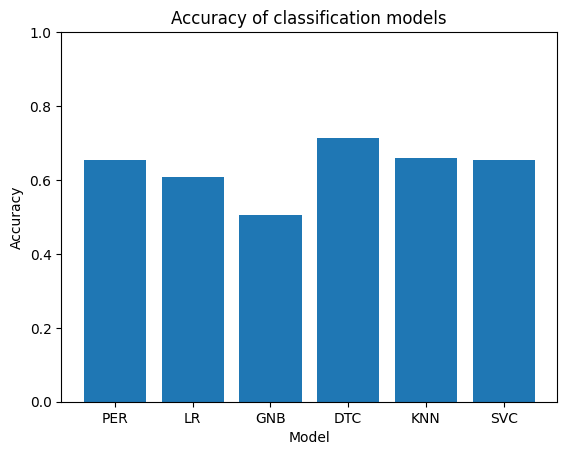

In [ ]:
import matplotlib.pyplot as plt
plt.bar(clf_name, test_acc1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of classification models')
plt.ylim(0,1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr_predictions = lr.predict(x_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)
dt_predictions = dt.predict(x_test_scaled)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Random Forest Regression
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)
rf_predictions = rf.predict(x_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print the evaluation metrics
print("Linear Regression:")
print("MSE:", lr_mse)
print("R2 Score:", lr_r2)

print("\nDecision Tree Regression:")
print("MSE:", dt_mse)
print("R2 Score:", dt_r2)

print("\nRandom Forest Regression:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)

Linear Regression:
MSE: 0.20533637844077277
R2 Score: 0.0

Decision Tree Regression:
MSE: 0.2857142857142857
R2 Score: 0.0

Random Forest Regression:
MSE: 0.2857142857142857
R2 Score: 0.0


In [ ]:
x_test_scaled[0]

array([-1.68927752, -1.44230659, -1.53283194, -1.20537658, -1.1160898 ,
       -1.20501377, -1.99747254, -2.42193574, -1.53484095, -1.37386875,
       -1.76928234, -1.53473637,  1.75137737, -1.50394261,  3.31164892,
        0.40892618,  0.31411222, -0.7281036 ,  1.06226095, -0.38685305,
        0.48851653,  0.50909409, -0.62878843, -1.13048976, -1.32041888,
       -0.70298896, -0.81625526])

In [ ]:
import pickle
with open('classifier.pkl', 'wb') as file:
   pickle.dump(clf6, file)
   import numpy as np
input = np.array([[-1.68927752, -1.44230659, -1.53283194, -1.20537658, -1.1160898 ,
       -1.20501377, -1.99747254, -2.42193574, -1.53484095, -1.37386875,
       -1.76928234, -1.53473637,  1.75137737, -1.50394261,  3.31164892,
        0.40892618,  0.31411222, -0.7281036 ,  1.06226095, -0.38685305,
        0.48851653,  0.50909409, -0.62878843, -1.13048976, -1.32041888,
       -0.70298896, -0.81625526]])

In [ ]:
clf4.predict(input)

array([1])

***This shows that the subject has Parkinson disease.***